<a href="https://colab.research.google.com/github/LucasNeiaTorres/previsao-de-salario/blob/main/previsao_salario_FIFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dados = pd.read_csv('sds_fifa.csv')

In [ ]:
dados.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
colunas = ['Nome', 'Time']

In [ ]:
dados.drop(colunas, axis=1, inplace=True)

In [ ]:
dados['Salario'] = dados['Salario'].str.replace('€', '')

In [ ]:
dados['Salario'] = dados['Salario'].str.replace('K', '000')

In [ ]:
dados['Salario'] = dados['Salario'].astype(str).astype(int)

In [ ]:
dados = dados[['Idade', 'Posicao', 'Media', 'Potencial','Total_Pontos', 
               'Salario']]

In [ ]:
X = dados.iloc[:, :-1].values

In [ ]:
y = dados.iloc[:, -1].values

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer([('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = ct.fit_transform(X).toarray()

# Criar Machine Learning


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[256713.74 230000.  ]
 [374023.63 290000.  ]
 [162110.57 125000.  ]
 [109574.93 190000.  ]
 [150961.86 140000.  ]
 [216310.3  280000.  ]
 [273782.26 310000.  ]
 [194097.05 140000.  ]
 [279970.37 350000.  ]
 [130993.7  110000.  ]
 [224923.26 220000.  ]
 [184287.85 145000.  ]
 [128040.34 125000.  ]
 [148828.84 110000.  ]
 [220169.31 160000.  ]
 [147481.8  190000.  ]
 [374023.63 290000.  ]
 [ 51583.47  24000.  ]
 [343527.92 470000.  ]
 [326575.22 370000.  ]
 [162110.57 125000.  ]
 [465983.33 560000.  ]
 [194097.05 140000.  ]
 [256713.74 230000.  ]
 [172119.66 210000.  ]
 [306765.   300000.  ]
 [109574.93 190000.  ]
 [224923.26 220000.  ]
 [232019.26 280000.  ]
 [194240.64 135000.  ]
 [220169.31 160000.  ]
 [279970.37 350000.  ]
 [306765.   300000.  ]
 [256713.74 230000.  ]
 [343527.92 470000.  ]
 [184287.85 145000.  ]
 [ 97601.2  190000.  ]
 [205421.37 280000.  ]
 [223194.39 160000.  ]
 [407480.74 410000.  ]
 [148828.84 110000.  ]
 [273782.26 310000.  ]
 [223194.39 160000.  ]
 [313262.23

In [ ]:
regressor.score(X_test, y_test)

0.7089710245098851

In [ ]:
importancia = regressor.coef_

Feature: 0, Score: -15488.79498
Feature: 1, Score: -24056.10953
Feature: 2, Score: -3604.48948
Feature: 3, Score: 21358.00069
Feature: 4, Score: -5059.89474
Feature: 5, Score: 31067.59775
Feature: 6, Score: 33022.85982
Feature: 7, Score: 639.84003
Feature: 8, Score: 23847.25937
Feature: 9, Score: 27678.57481
Feature: 10, Score: -62080.98557
Feature: 11, Score: 4325.44699
Feature: 12, Score: -31649.30514
Feature: 13, Score: 7035.22525
Feature: 14, Score: 23255.08848
Feature: 15, Score: 8990.88866
Feature: 16, Score: 155.43994


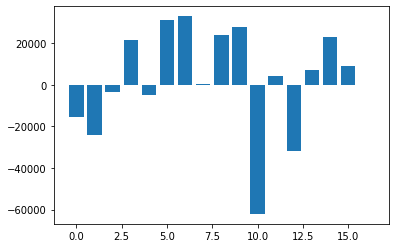

In [ ]:
for i, v in enumerate(importancia):
  print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importancia))], importancia)
plt.show()

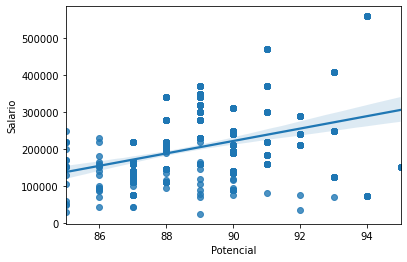

In [ ]:
sns.regplot(x='Potencial', y='Salario', data=dados)

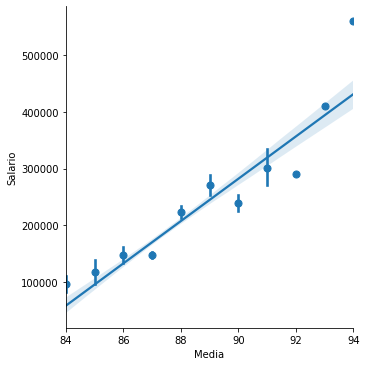

In [ ]:
sns.lmplot(x='Media', y='Salario', data=dados, x_estimator=np.mean)

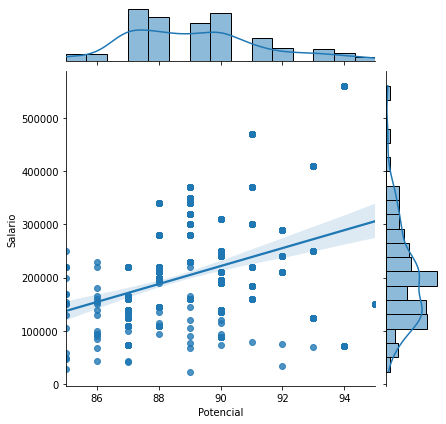

In [ ]:
sns.jointplot(x='Potencial', y='Salario', data=dados, kind='reg')